In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=False)
# please show all columns
pd.set_option("display.max_columns", 60)
import seaborn as sns
sns.set()

In [3]:
dftts = pd.read_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180119.csv',
                    parse_dates=['install_date'],
                    index_col='row_id',
                    encoding = 'utf-8', 
                    dtype={'zipcode' : np.object})

In [4]:
dftts.head()

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
1,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,1998-01-09,2.2824,24500.00,False,RES,False,False,False,False,94107.0,San Francisco,San Francisco,CA,False,False,False,10.734315
2,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1998-01-30,1.8504,20555.54,False,RES,False,False,False,False,95949.0,Nevada City,Nevada,CA,False,False,False,11.108701
4,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,1998-02-04,2.3076,20000.00,False,RES,False,False,False,False,94518.0,Concord,Contra Costa,CA,False,False,False,8.667013
6,10107745,California Public Utilities Commission (Curren...,PGE-INT-11280 & CA_ERP_24429,CA-NEM-11770,1998-04-03,2.3316,30941.00,False,RES,False,False,False,False,94038.0,Moss Beach,San Mateo,CA,False,False,False,13.270286
7,10107787,California Public Utilities Commission (Curren...,PGE-INT-11284 & CA_ERP_24701,CA-NEM-11812,1998-04-30,0.9300,13629.00,False,RES,False,False,False,False,94563.0,Orinda,Contra Costa,CA,False,False,False,14.654839


In [5]:
dftts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786580 entries, 1 to 1094908
Data columns (total 21 columns):
file_row           786580 non-null int64
data_provider      786580 non-null object
sysid_dp           772671 non-null object
sysid_tts          786580 non-null object
install_date       786580 non-null datetime64[ns]
size_kw            786580 non-null float64
price              786580 non-null float64
appraised_value    786580 non-null bool
cust_type          786580 non-null object
new_const          786580 non-null bool
tracking           786580 non-null bool
ground_mounted     786580 non-null bool
battery            786580 non-null bool
zipcode            786580 non-null object
city               782628 non-null object
county             602759 non-null object
state              786580 non-null object
third-party        786580 non-null bool
uinverter          786580 non-null bool
dc_optimizer       786580 non-null bool
cost_per_watt      786580 non-null float64
dtypes: bool

In [6]:
tts_by_year = dftts.groupby(lambda x: dftts.loc[x, 'install_date'].year)

##### More data in original files in 2014 but current set has very few NaNs
```
1998        21
1999       172
2000       154
2001      1182
2002      2325
2003      3413
2004      5443
2005      5840
2006      9298
2007     13581
2008     16700
2009     30722
2010     44928
2011     57921
2012     77179
2013    115214
2014    164335
2015    266403
2016    280078
dtype: int64
```
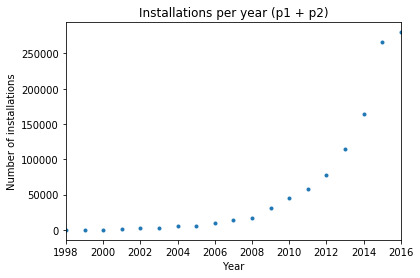

In [7]:
# how many per year
tts_by_year.size()

1998        16
1999       160
2000       141
2001      1131
2002      2230
2003      3131
2004      5086
2005      5461
2006      8411
2007     11500
2008     13405
2009     26069
2010     38279
2011     44926
2012     58737
2013     73764
2014     67393
2015    179553
2016    247187
dtype: int64

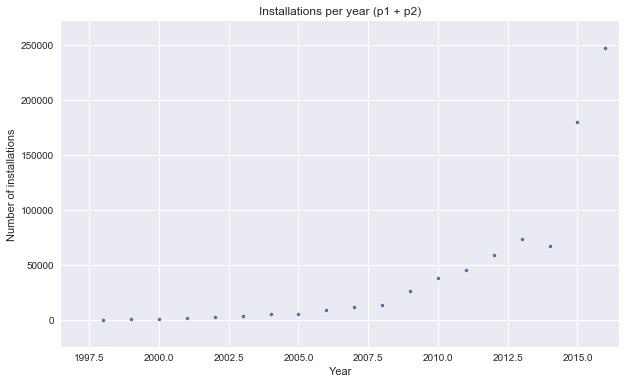

In [8]:
# show me a picture
tts_by_year.size().plot(marker='.', linestyle='none')
plt.xlim(1996.5,2016.5)
plt.xlabel("Year")
plt.ylabel("Number of installations")
plt.title('Installations per year (p1 + p2)')
plt.margins(0.1);

#### Look at distribution of size_kw

In [9]:
# median size was 5.84kw; cleaned data, 5.87kw
dftts.size_kw.describe()

count    7.865800e+05
mean     1.103484e+01
std      6.927191e+01
min      9.768000e-16
25%      4.080000e+00
50%      5.870000e+00
75%      8.250000e+00
max      7.569000e+03
Name: size_kw, dtype: float64

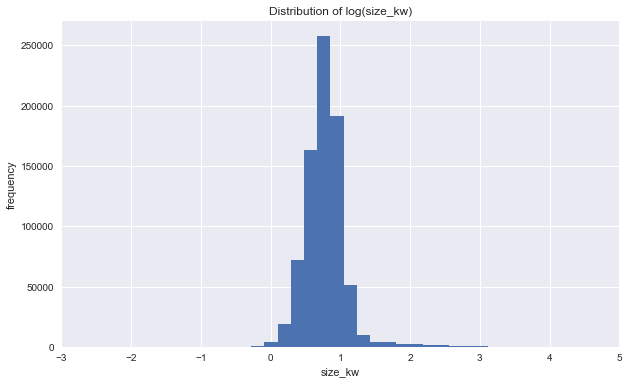

In [10]:
# plot the distribution; log cleans it up
np.log10(dftts.size_kw).plot(kind='hist', bins=100)
plt.xlim((-3, +5))
plt.title('Distribution of log(size_kw)')
plt.xlabel('size_kw')
plt.ylabel('frequency');

#### Look at distribution of total cost of installation

In [11]:
# median size was $29.7k; cleaned data median is 28.0k
dftts.price.describe()

count    7.865800e+05
mean     3.538467e+05
std      2.504812e+08
min      1.000000e-02
25%      1.942865e+04
50%      2.795520e+04
75%      3.989269e+04
max      2.220000e+11
Name: price, dtype: float64

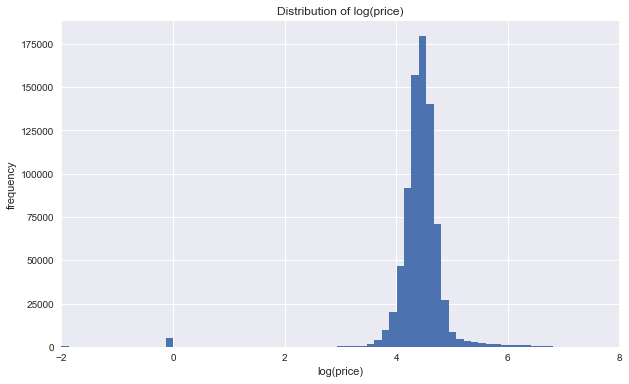

In [12]:
# plot distribution of total cost; log cleans it up
np.log10(dftts.price).plot(kind='hist', bins=100)
plt.xlim((-2, 8))
plt.title('Distribution of log(price)')
plt.xlabel('log(price)')
plt.ylabel('frequency');

#### Look at cost_per_watt distribution

In [13]:
# median of full dataset was $4.91/watt; clean, $4.92
dftts.cost_per_watt.describe()

count    7.865800e+05
mean     7.111638e+10
std      6.307265e+13
min      2.184503e-09
25%      3.993870e+00
50%      4.920000e+00
75%      5.817021e+00
max      5.593872e+16
Name: cost_per_watt, dtype: float64

In [14]:
# 6000 < a dime/watt; not good
(dftts.cost_per_watt < 0.10).sum()

5984

In [15]:
# 558 > $50/watt; also not good
(dftts.cost_per_watt > 50).sum()

558

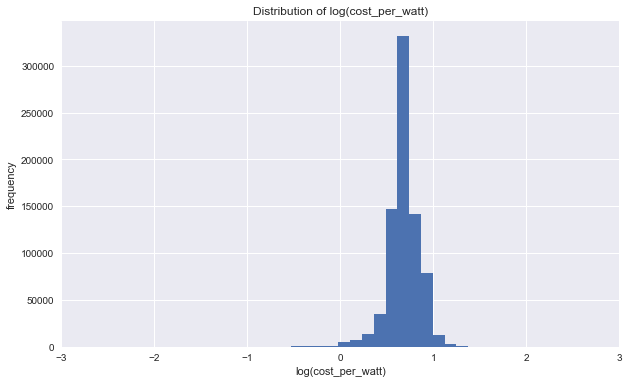

In [16]:
# but most of the data is reasonable
np.log10(dftts.cost_per_watt).plot(kind='hist', bins=200)
plt.xlim((-3, 3))
plt.title('Distribution of log(cost_per_watt)')
plt.xlabel('log(cost_per_watt)')
plt.ylabel('frequency');

#### look at median cost/watt by year and month

In [17]:
tts_by_year.cost_per_watt.median().head()

1998    7.825760
1999    6.296365
2000    8.485176
2001    8.340155
2002    8.300748
Name: cost_per_watt, dtype: float64

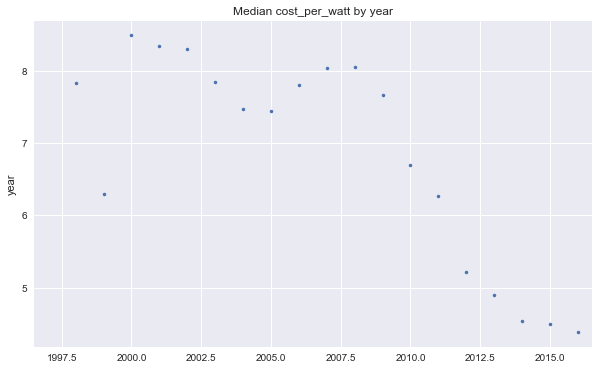

In [18]:
# now plot; cleaned up some in early years
# look at the median of cpw by year
tts_by_year.cost_per_watt.median().plot(linestyle='none', marker='.')
plt.xlim(1996.5,2016.5)
plt.title('Median cost_per_watt by year')
plt.ylabel('cost_per_watt')
plt.ylabel('year');

In [19]:
# group by year and month
byYearMonth = dftts.groupby([lambda x: dftts.loc[x, 'install_date'].year,
                             lambda x: dftts.loc[x, 'install_date'].month])

In [20]:
# check median cpw for first few 
byYearMonth.cost_per_watt.median().head(15)

1998  1     10.921508
      2      8.667013
      4     13.962563
      7      6.858942
      8      6.768190
      9      6.768190
      10     7.639235
      11    15.092849
1999  1      8.237212
      2     11.197593
      3      9.613848
      4      9.934052
      5      8.207175
      6      8.672848
      7      8.386899
Name: cost_per_watt, dtype: float64

Text(0,0.5,'year/month')

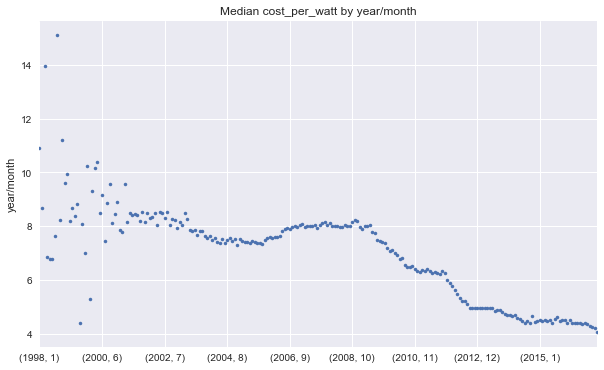

In [21]:
# looks okay
byYearMonth.cost_per_watt.median().plot(linestyle='none', marker='.')
plt.title('Median cost_per_watt by year/month')
plt.ylabel('cost_per_watt')
plt.ylabel('year/month')

#### Stopping.  Next step - same plot as above but by customer type...

In [22]:
install_date_year = dftts.install_date.map(lambda x: x.year)

In [23]:
install_date_year.head()

row_id
1    1998
2    1998
4    1998
6    1998
7    1998
Name: install_date, dtype: int64

In [24]:
install_date_month = dftts.install_date.map(lambda x: x.month)

In [25]:
# see ../story/median_cost
# now look at median install price by type/year/month
typeYearMonth = pd.DataFrame(dftts.groupby(['cust_type', 
                                            install_date_year,
                                            install_date_month])['cost_per_watt'].median())
typeYearMonth.head()

cost_per_watt
cust_type install_date install_date               
COM       1998         11                 5.460589
          1999         1                  8.237212
                       4                  8.308584
                       5                  5.187260
                       7                  5.815229

In [26]:
yearMonthbyType = typeYearMonth.unstack('cust_type'); yearMonthbyType.head()

cost_per_watt                                    \
cust_type                           COM GOV NON-PROFIT NON-RES        RES   
install_date install_date                                                   
1998         1                      NaN NaN        NaN     NaN  10.921508   
             2                      NaN NaN        NaN     NaN   8.667013   
             4                      NaN NaN        NaN     NaN  13.962563   
             7                      NaN NaN        NaN     NaN   6.858942   
             8                      NaN NaN        NaN     NaN   6.768190   

                                             
cust_type                 SCHOOL TAX-EXEMPT  
install_date install_date                    
1998         1               NaN        NaN  
             2               NaN        NaN  
             4               NaN        NaN  
             7               NaN        NaN  
             8               NaN        NaN

In [27]:
yearMonthbyType.index.values[:3]

array([(1998, 1), (1998, 2), (1998, 4)], dtype=object)

In [28]:
def yearMonthTup_to_datetime(tup):
    ''' Takes a tuple of the form (year(int), month(int)); returns datetime for first of that month'''
    str = '{}{:02d}{}'.format(tup[0], tup[1], '01')
    return pd.to_datetime(str)

In [29]:
theNewIndex = yearMonthbyType.index.map(yearMonthTup_to_datetime)

theNewIndex[:5]

DatetimeIndex(['1998-01-01', '1998-02-01', '1998-04-01', '1998-07-01',
               '1998-08-01'],
              dtype='datetime64[ns]', freq=None)

(0, 10)

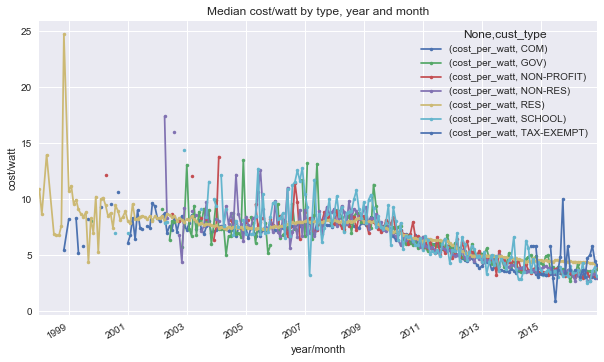

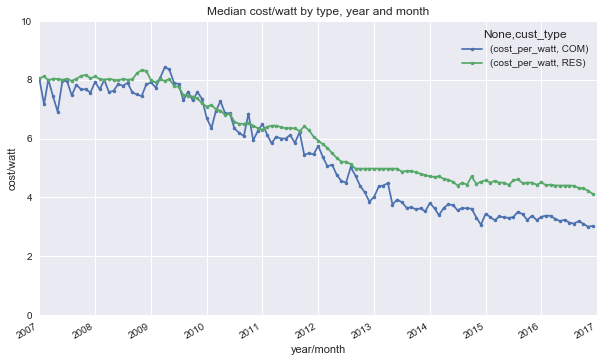

In [30]:
yearMonthbyType.index = theNewIndex; yearMonthbyType.head()
yearMonthbyType.plot(marker='.')
plt.title('Median cost/watt by type, year and month')
plt.xlabel('year/month')
plt.ylabel('cost/watt');

yearMonthbyType.loc[:, (slice(None), ['RES','COM'])].plot(marker='.')
plt.title('Median cost/watt by type, year and month')
plt.xlabel('year/month')
plt.ylabel('cost/watt');
plt.xlim((pd.to_datetime('2007'),pd.to_datetime('2017')))
plt.ylim((0,10))